## **Probabilities**

In 1814, Pierre-Simon Laplace wrote:  
> Probability theory is nothing but common sense reduced to calculation. 
... [Probability] is thus simply a fraction whose numerator is the 
number of favorable cases and whose denominator is the number of all 
the cases possible ... when nothing leads us to expect that any one of 
these cases should occur more than any other.

Laplace nailed it. To untangle a probability problem, all you have to do 
is define exactly what the cases are, and careful count the favorable 
and total cases. Let's be clear on our vocabulary words:

- **Trial:**  
A single occurrence with an outcome that is uncertain until we observe it. 
*For example, rolling a single die.*
- **Outcome:**  
A possible result of a trial; one particular state of the world. What 
Laplace calls a **case.** *For example:* `4`.
- **Sample Space:**  
The set of all possible outcomes for the trial. 
*For example,* `{1, 2, 3, 4, 5, 6}`.
- **Event:**  
A subset of the sample space, a set of outcomes that together have some 
property we are interested in.  
*For example, the event "even die roll" is the set of outcomes* 
`{2, 4, 6}`. 
- **Probability:**  
As Laplace said, the probability of an event with respect to a sample 
space is the "number of favorable cases" (outcomes from the sample space 
that are in the event) divided by the "number of all the cases" in the 
sample space (assuming "nothing leads us to expect that any one of these 
cases should occur more than any other"). Since this is a proper 
fraction, probability will always be a number between 0 (representing an 
impossible event) and 1 (representing a certain event).  
*For example, the probability of an even die roll is 3/6 = 1/2.*

In [1]:
# Step 0. Load libraries and custom modules
# Basics ---------------------------------------------------------------
import os
import pickle
import random
# Maths ----------------------------------------------------------------
from fractions import Fraction
# Data -----------------------------------------------------------------
import pandas as pd
import numpy as np
# Graphics -------------------------------------------------------------
import matplotlib.pyplot as plt
# Custom modules -------------------------------------------------------
def Pr(event: set, space: set)->Fraction:
    """
    The probability of a event, given a space
    """
    return Fraction(len(set.intersection(event, space)),len(space))

**1.** What's the probability of rolling an even number with a single six-sided fair die?  
- space = $\{1,2,3,4,5,6\}$
- event = $\{2,4,6\}$

In [2]:
Pr({2,4,6},{1,2,3,4,5,6})

Fraction(1, 2)

**2.** What's the probability of rolling an even or prime number with a single six-sided fair die?  
- space = $\{1,2,3,4,5,6\}$
- event = $\{2,4,6\}$ (even) **or** $\{2,3,5\}$ (prime)

In [3]:
Pr(({2,4,6}|{2,3,5}),{1,2,3,4,5,6})

Fraction(5, 6)

**2.** What's the probability of rolling an even or prime number with a single six-sided fair die?  
- space = $\{1,2,3,4,5,6\}$
- event = $\{2,4,6\}$ (even) **and** $\{2,3,5\}$ (prime)

In [4]:
Pr(({2,4,6}&{2,3,5}),{1,2,3,4,5,6})

Fraction(1, 6)

**Frequentist Theory for probabilities**  
Theories about relative frequence say that, the only valid procedure to determine probabilities of an event is by repeated experiments. So:
$$ Pr(E) = \lim_{n \to \infty}\frac{x}{n}$$
This approach is grounded in the law of large numbers, which states that as the number of trials increases, the relative frequency of an event will converge to its true probability.[1]

**Monte Carlo method**  
Monte Carlo methods, or Monte Carlo experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle. The name comes from the Monte Carlo Casino in Monaco, where the primary developer of the method, mathematician Stanisław Ulam, was inspired by his uncle's gambling habits.[2]

**4.** What's the probability of rolling an even number with a single six-sided fair die? Calculate the relative frequency on many trials (could be up to 1000)

In [5]:
# Create a list of events, results, and trials
events = [2,4,6]
results = [1,2,3,4,5,6]
trials = list(range(1,1001))
freq = []
# For each trial, calculate the relative frequency of success, and save
for trial in trials:
    total = 0
    for i in range(trial):
        if random.choice(results) in events:
            total += 1
    freq.append(total/trial)

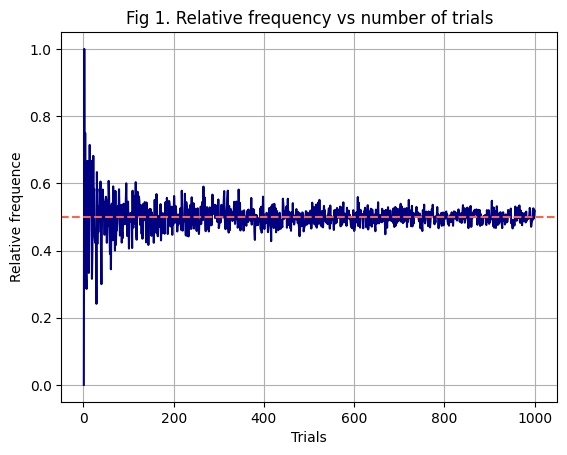

In [6]:
# Plot the relative frequency, you'll see how it converges
plt.plot(trials, freq, color='navy')
plt.xlabel('Trials')
plt.ylabel('Relative frequence')
plt.axhline(y=1/2, color='tomato', linestyle='--')
plt.grid(True)
plt.title('Fig 1. Relative frequency vs number of trials')
plt.show()

**The tale of Ali Kwazoor**

The Wise Man held out two boxes. One box was red, the other yellow.

“In the red box there are four pebbles—one black pebble and three
white ones,” said the Wise Man. “In the yellow box there are seven
pebbles—three black ones and four white ones. Without looking, you
must take a pebble from one of the boxes. If you pick a black pebble,
the treasure is yours. But if you pick a white pebble, you will leave no
richer than you came!”[3]

Which box would you take?

In [7]:
# Create the boxes, calculate the probabilities
red_box = {1,-1,-2,-3}
yellow_box = [1,2,3,-1,-2,-3,-4]
prob_red = Pr({1},red_box)
dec_prob_red = prob_red.numerator/prob_red.denominator
prob_yellow = Pr({1, 2, 3}, yellow_box)
dec_prob_yellow = prob_yellow.numerator/prob_yellow.denominator
print(f'Prob: {prob_red}, dec: {dec_prob_red:.2f}')
print(f'Prob: {prob_yellow}, dec: {dec_prob_yellow:.2f}')

Prob: 1/4, dec: 0.25
Prob: 3/7, dec: 0.43


**The Birthday Problem**  

Suppose you are in a classroom with 50 people. If we assume this is a randomly selected group of 50 people, what is the chance that at least two people have the same birthday? Although it is somewhat advanced, we can deduce this mathematically. We will do this later. Here we use a Monte Carlo simulation. For simplicity, we assume nobody was born on February 29. This actually doesn’t change the answer much.

First, note that birthdays can be represented as numbers between 1 and 365, so a sample of 50 birthdays can be obtained like this:

In [8]:
# Let's proceed with a numpy approach. Create n birthdays at random
n = 50
bdays = np.random.choice(range(1, 366), n, replace=True)
B = 10_000
results = []
for i in range(B):
    bdays = np.random.choice(range(1, 366), n, replace=True)
    if len(np.unique(bdays)) < n:
        results.append(1)
    else:
        results.append(0)

text = "Probability of at least two people having the same birthday is " 
text += str(np.mean(results))
print(text)


Probability of at least two people having the same birthday is 0.9702


**Independence**

Suppose you toss a coin twice. Each result is independent because the 
result of one coin doesn't influence the other. We say that the events 
are independent. For each coin, the probability of getting heads or 
tails is the same (0.5). So, what is the probability of getting a second 
head, if in the first toss I got a head?  

**Pr**(Toss 2 is a head|Toss 1 is a head) = 0.5

Now, suppose you are in a card game, and we deal a first card, say King. 
The probability of getting a King is 4/52 = 1/13. Now, what would be the 
probability of getting another King, if in the first extraction we got 
a King? These events are not independent. 

**Pr**(Card 2 is a King|Card 1 is a King) = 3/51

In [9]:
# Let's create a deck of cards
suits = ['Heart-']*13 + ['Diamond-']*13 + ['Spade-']*13 + ['Club-']*13
ranks = ['2','3','4','5','6','7','8','9','10','J','Q','K','A'] * 4
deck = np.char.add(suits, ranks)

In [10]:
# Let's create our Monte Carlo simulation
results = []
for i in range(1000):
    tryout = []
    for j in range(1000):
        extraction_1 = np.random.choice(deck)
        if extraction_1.endswith("-A"):
            extraction_2 = np.random.choice(deck)
            if extraction_2.endswith("-A"):
                tryout.append(1)
            else:
                tryout.append(0)
        else:
            tryout.append(0)
    results.append(np.mean(tryout))
np.mean(results)

np.float64(0.0059970000000000015)